# Design of experiments

This notebook illustrates how to build various types of Designs of Experiments (DoE). All DoEs are generated on the domain $[0, 1]^d$.

In [1]:
## import required libraries
import numpy as np
import pandas as pd
import inferlycore as core
from inferlycore.data.doe import doe_kmeans

%matplotlib inline
import matplotlib.pyplot as plt


## Uniform DoE with k-means

First of all let's set some default parameters.

In [2]:
n = 100                              # number of points in the DoE
d = 2                                # dimension of the input space
input_names = ['x1', 'x2']           # name of each input variable

We can now compare two ways of generating uniform DoEs on the unit cube:
* Uniform samples. This is possibly the simplest way to generate a DoE but it does not offer a good coverage of the space
* k-means. We sample a large number of points uniformly and select the $n$ centroids found with k-means as the DoE

In [3]:
X_unif = pd.DataFrame(np.random.uniform(size=(n, d)), columns=input_names)

X_kmeans = doe_kmeans(n=n, dim=d, input_names=input_names)

X_kmeans


,x1,x2
0,0.484217,0.755185
1,0.162076,0.508456
2,0.050319,0.773244
3,0.123368,0.562660
4,0.154975,0.788385
...,...,...
95,0.247277,0.947707
96,0.220675,0.753089
97,0.107376,0.289905
98,0.857363,0.752984


When compared side by side, one can see that the k-means DoE offers a better coverage of input space (ih has less holes and clusters)

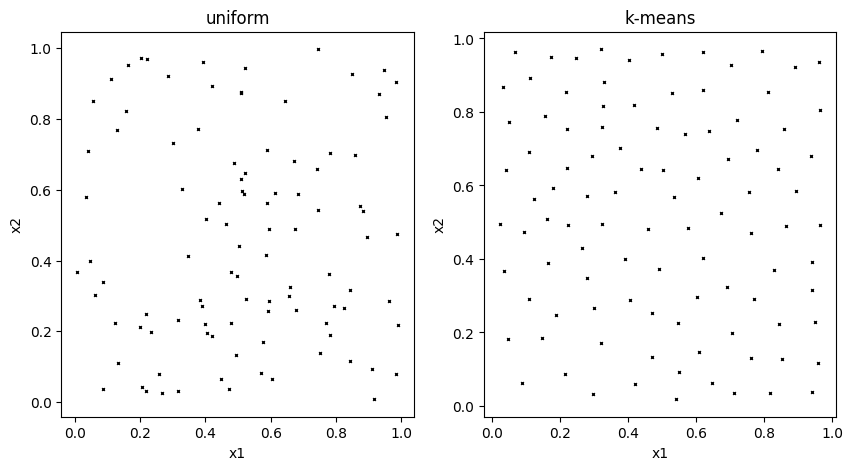

In [4]:
doe_names = ['uniform', 'k-means']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, X in enumerate([X_unif, X_kmeans]):
    axes[i].plot(X.iloc[:, 0], X.iloc[:, 1], 'kx', ms=2)
    axes[i].set_title(doe_names[i])
    axes[i].set_xlabel(X.columns[0])
    axes[i].set_ylabel(X.columns[1])


## Cartesian product of DoEs

The cartesian product of two DoEs $X_1$ and $X_2$ is given by $\{ (x1, x2),\ x1 \in X_1,\ x2 \in X_2\}$.

X1.shape:     (10, 1)
X2.shape:     (5, 1)
X_grid.shape: (50, 2)


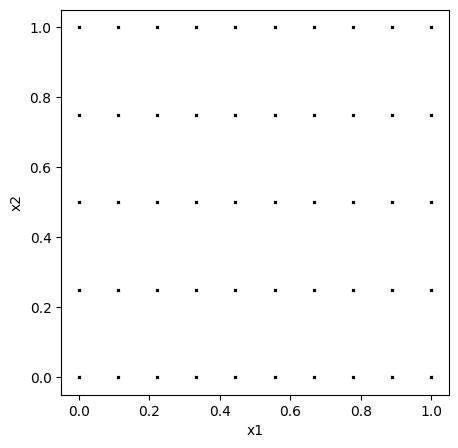

In [15]:
X1 = pd.DataFrame(np.linspace(0, 1, 10), columns=['x1'])
X2 = pd.DataFrame(np.linspace(0, 1, 5), columns=['x2'])
print('X1.shape:    ', X1.shape)
print('X2.shape:    ', X2.shape)

X_grid = core.doe.cartesian_product(X1, X2)
print('X_grid.shape:', X_grid.shape)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(X_grid.iloc[:, 0], X_grid.iloc[:, 1], 'kx', ms=2)
ax.set_xlabel(X_grid.columns[0])
ax.set_ylabel(X_grid.columns[1]); 

It is sometimes interesting to perform batches of experiments where one variable varies while the other are kept fixed. In the following, we assume that the variable along which the sweep is performed is $t$.

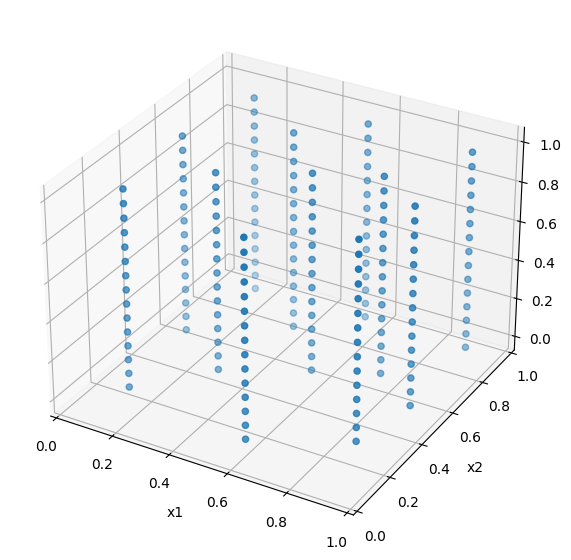

In [6]:
X_kmeans = doe_kmeans(n=12, dim=d, input_names=input_names)
X_time = pd.DataFrame(np.linspace(0, 1, 15), columns=['t'])

X =  core.doe.cartesian_product(X_kmeans, X_time)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(X['x1'], X['x2'], X['t'], marker='o')
ax.set_xlim((0, 1))
ax.set_ylim((0, 1))
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('t');
